 - HW4: Graths and Trees
 - By: Dima Mikhaylov
 - ID: agp7dp

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Modeling Data Using a Graph

In this exercise we will model and analyze example Twitter social network data. Assume we have information about a small network of Twitter users -- specifically who each user "follows". Thus we are modeling the "follows" relation using a graph.

Using the following data table below complete the stated questions.


* Dan follows Jane, Bob, Sally, Sam, Tiana, Juan, and Wei
* Wei follows Dan, Bob, and Sam
* Bob follows Jane, Wei, and Tiana
* Tiana follows Jane and Juan
* Sally follows Bob
* Jane follows Jane and Wei
* Juan follows Sally and Jane
* Sam follows Jane

#### Question 1.
Would you use a undirected graph or a directed graph to model this data? Explain.

#### Answer 1: 
Given that it is a "follower" type of relationship, directed graph model is a suitable represenatation for this data. The fact that Jane is followed by so many people does not mean that Jane needs to follow them back. As there is no reciprocity on these relationships, direction of the relationship is important. 

#### Question 2.
Create this graph using NetworkX and plot the resulting graph.

#### Answer 2:

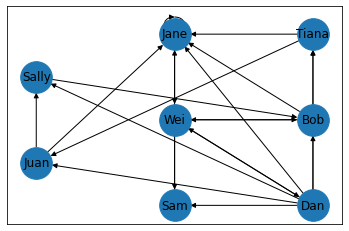

In [20]:
# define the graph
G = nx.DiGraph([("Dan", "Jane"), ("Dan", "Bob"), ("Dan", "Sally"), # Dan's followers
                ("Dan", "Sam"), ("Dan", "Tiana"), ("Dan", "Juan"), ("Dan", "Wei"), # Dan's followers
                ("Wei", "Dan"), ("Wei", "Bob"), ("Wei", "Sam"), # Wei's followers
                ("Bob", "Jane"), ("Bob", "Wei"), ("Bob", "Tiana"), # # Bob's followers
                ("Tiana", "Jane"), ("Tiana", "Juan"), # Tiana's followers
                ("Sally", "Bob"), # Sally's followers
                ("Jane", "Jane"), ("Jane", "Wei"), # Jane's followers
                ("Juan", "Sally"), ("Juan", "Jane"), # # Juan's followers
                ("Sam", "Jane") # # Sam's followers
                ])

# group nodes by column
left_nodes = ["Susan", "Juan", "Sally"]
middle_nodes = ["Sam", "Wei", "Jane"]
right_nodes = ["Dan", "Bob", "Tiana"]

# set the position according to column x-coordinate
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

# draw the network
nx.draw_networkx(G, pos, node_size = 1000)

#### Question 3.
Assume you wanted to determine which user was the biggest "social influencer". Which graph measure would you compute and why?

#### Question 3:
Betweenness centrality is probably the best measure that can be easily computed to determine the biggest "social influencer" as it reflects the relative importance of nodes by measuring the control over information passing through. It also relects the ability of nodes to disrupt communication over the network due to their removal. An alternative measure could be in-degree of nodes. 

#### Question 4.
Compute the measure chosen and determine who in this example was the biggest social influencer. See example below which analyzes facebook social network data. You will need to have data file facebook_combined.txt to complete this example.

#### Answer 4: 
It appears that node "Wei" has higher centrality, although node "Jane" has higher in-degree, i.e. the node has more followers. "Wei" is more important to the network in general because her followers taken jointly are more important in propagating information through the network. Therefore the node "Wei" could be considered the biggest "social influencer".

In [21]:
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
sorted(betCent, key=betCent.get, reverse=True)

['Wei', 'Jane', 'Bob', 'Dan', 'Sally', 'Tiana', 'Juan', 'Sam']

(-1.1979270790855678,
 1.082946879900499,
 -0.9788380862935782,
 1.0653541217756652)

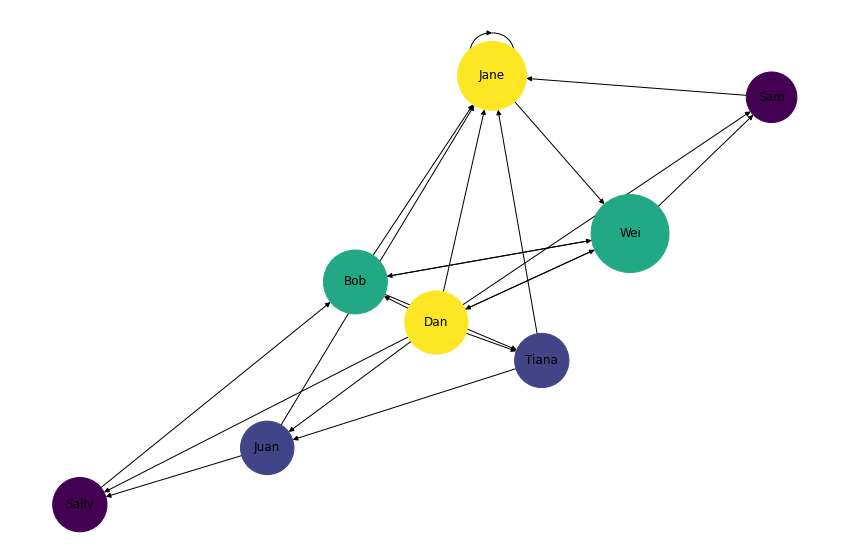

In [26]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(15,10))
nx.draw_networkx(G, pos=pos, 
                 with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')